In [1]:
pip install matplotlib pandas numpy seaborn

In [4]:
pip install plotly.express plotly

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl.metadata (1.7 kB)


In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

#Loading the data and managing data types

In [8]:
# Download Csv file from previous lecture

df = pd.read_csv('/content/credit_card_default.csv', index_col=0, na_values='')
print(f'The DataFrame has {len(df)} rows and {df.shape[1]} columns.')
df.head()

The DataFrame has 30000 rows and 24 columns.


,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,Unknown,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Separate the features from the target:

In [9]:
X = df.copy()
y = X.pop('default_payment_next_month')

In [10]:
df.dtypes

,0
limit_bal,int64
sex,object
education,object
marriage,object
age,float64
payment_status_sep,object
payment_status_aug,object
payment_status_jul,object
payment_status_jun,object
payment_status_may,object


In [11]:
def get_df_memory_usage(df, top_columns=5):
    '''
    Function for quick analysis of a pandas DataFrames memory usage.
    It prints the top `top_columns` columns in terms of memory usage
    and the total usage of the DataFrame.

    Parameters
    ------------
    df : pd.DataFrame
    DataFrame to be inspected
    top_columns : int
    Number of top columns (in terms of memory used) to display
    '''''
    print('Memory usage ----')
    memory_per_column = df.memory_usage(deep=True) / 1024 ** 2
    print(f'Top {top_columns} columns by memory (MB):')
    print(memory_per_column.sort_values(ascending=False) \
                           .head(top_columns))
    print(f'Total size: {memory_per_column.sum():.4f} MB')

In [13]:
get_df_memory_usage(df, 5)

Memory usage ----
Top 5 columns by memory (MB):
education             1.965001
payment_status_sep    1.954342
payment_status_aug    1.920288
payment_status_jul    1.916343
payment_status_jun    1.904229
dtype: float64
Total size: 20.7012 MB


In [15]:
df_cat = df.copy()
object_columns = df_cat.select_dtypes(include='object').columns
df_cat[object_columns] = df_cat[object_columns].astype('category')

In [16]:
get_df_memory_usage(df_cat)

Memory usage ----
Top 5 columns by memory (MB):
Index                   0.228882
bill_statement_aug      0.228882
previous_payment_apr    0.228882
previous_payment_may    0.228882
previous_payment_jun    0.228882
dtype: float64
Total size: 3.9265 MB


In [17]:
column_dtypes = {'education': 'category',
                'marriage': 'category',
                'sex': 'category',
                'payment_status_sep': 'category',
                'payment_status_aug': 'category',
                'payment_status_jul': 'category',
                'payment_status_jun': 'category',
                'payment_status_may': 'category',
                'payment_status_apr': 'category'}
df_cat2 = pd.read_csv('credit_card_default.csv', index_col=0,
                      na_values='', dtype=column_dtypes)

In [18]:
get_df_memory_usage(df_cat2)

Memory usage ----
Top 5 columns by memory (MB):
Index                   0.228882
bill_statement_aug      0.228882
previous_payment_apr    0.228882
previous_payment_may    0.228882
previous_payment_jun    0.228882
dtype: float64
Total size: 3.9264 MB


In [19]:
df_cat.equals(df_cat2)

True

#Exploratory Data Analysis

##Import the libraries:

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.io as pio

Get summary statistics for numeric variables:

In [21]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
age,29850.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.08,71173.77,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.15,69349.39,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.95,64332.86,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.40,60797.16,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.76,59554.11,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.58,16563.28,0.0,1000.00,2100.0,5006.00,873552.0
previous_payment_aug,30000.0,5921.16,23040.87,0.0,833.00,2009.0,5000.00,1684259.0


Get summary statistics for categorical variables:

In [22]:
df.describe(include='object').transpose()

,count,unique,top,freq
sex,29850,2,Female,18027
education,29850,4,University,13960
marriage,29850,3,Single,15891
payment_status_sep,30000,10,Unknown,17496
payment_status_aug,30000,10,Unknown,19512
payment_status_jul,30000,10,Unknown,19849
payment_status_jun,30000,10,Unknown,20803
payment_status_may,30000,9,Unknown,21493
payment_status_apr,30000,9,Unknown,21181


Plot the distribution of age and split it by gender:

<ipython-input-25-056d86543641>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.sex=='Male', 'age'].dropna(),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-25-056d86543641>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdep

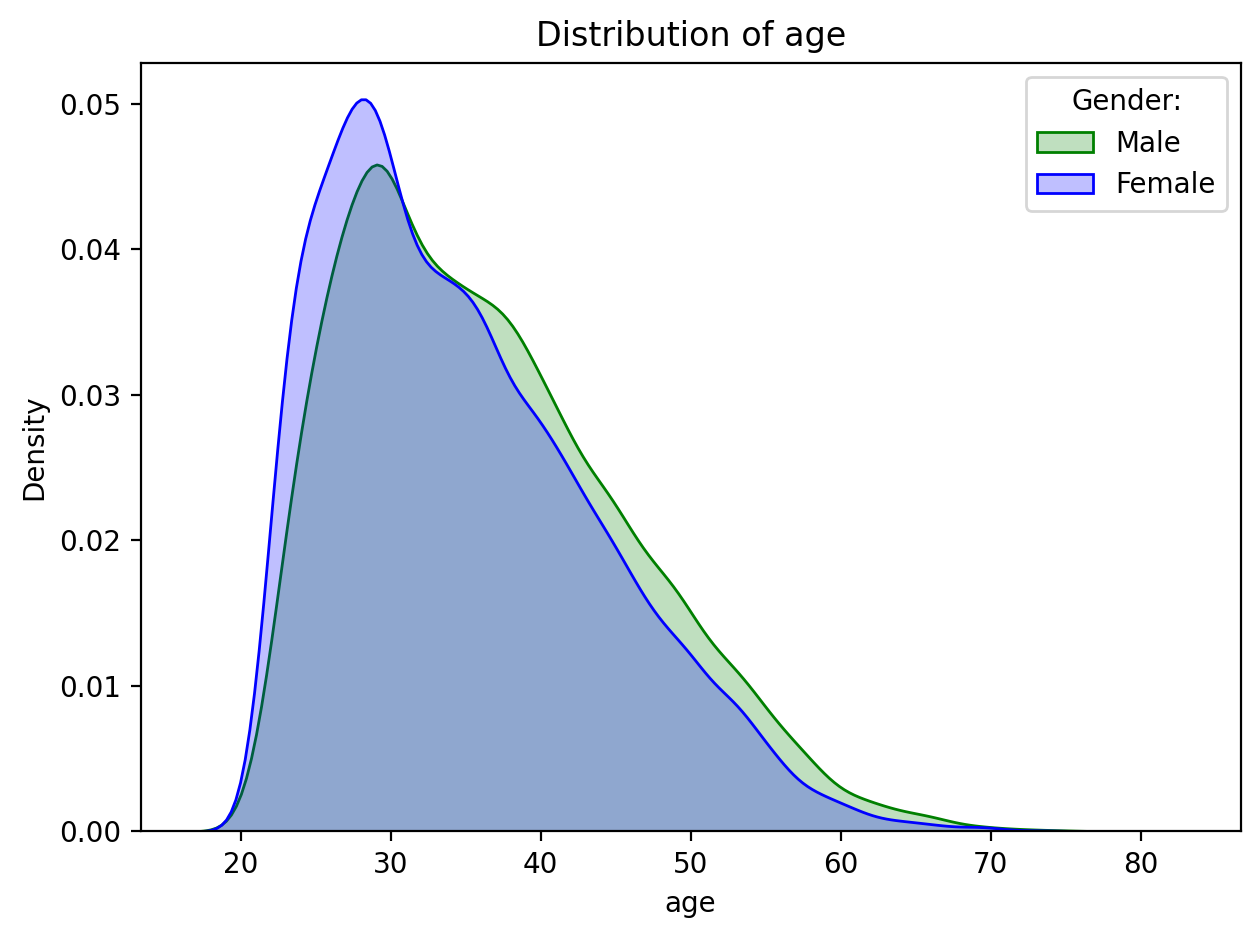

In [25]:
fig, ax = plt.subplots()
sns.distplot(df.loc[df.sex=='Male', 'age'].dropna(),
            hist=False, color='green',
            kde_kws={'shade': True},
            ax=ax, label='Male')
sns.distplot(df.loc[df.sex=='Female', 'age'].dropna(),
            hist=False, color='blue',
            kde_kws={'shade': True},
            ax=ax, label='Female')
ax.set_title('Distribution of age')
ax.legend(title='Gender:')

plt.tight_layout()
plt.show()

As mentioned in the text, we can create a histogram (together with the KDE), by calling:

<ipython-input-28-adcad1506954>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.age.dropna(), )


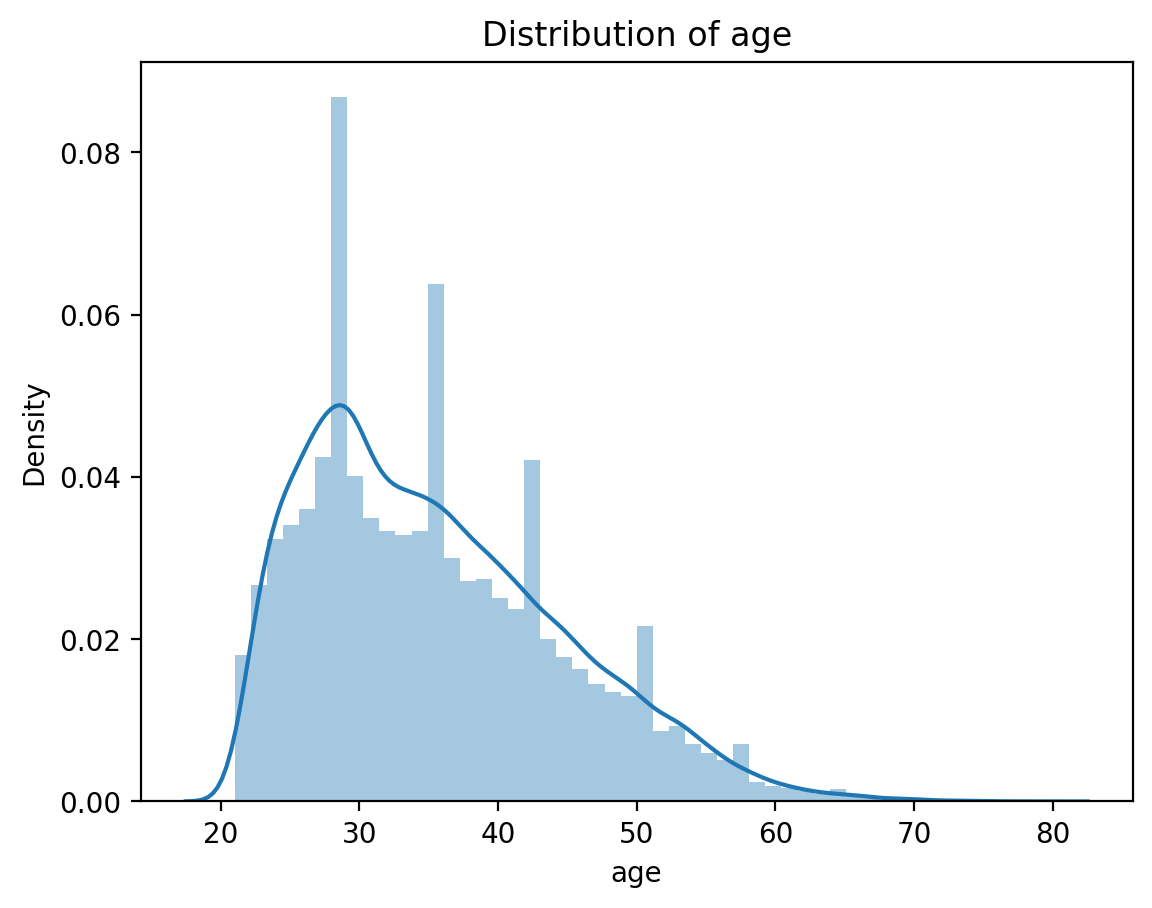

In [28]:
ax = sns.distplot(df.age.dropna(), )
ax.set_title('Distribution of age');

We noticed some spikes appearing every ~10 years and the reason for this is the binning. Below, we created the same histogram using sns.countplot and plotly_express. By doing so, each value of age has a separate bin and we can inspect the plot in detail. There are no such spikes in the following plots:

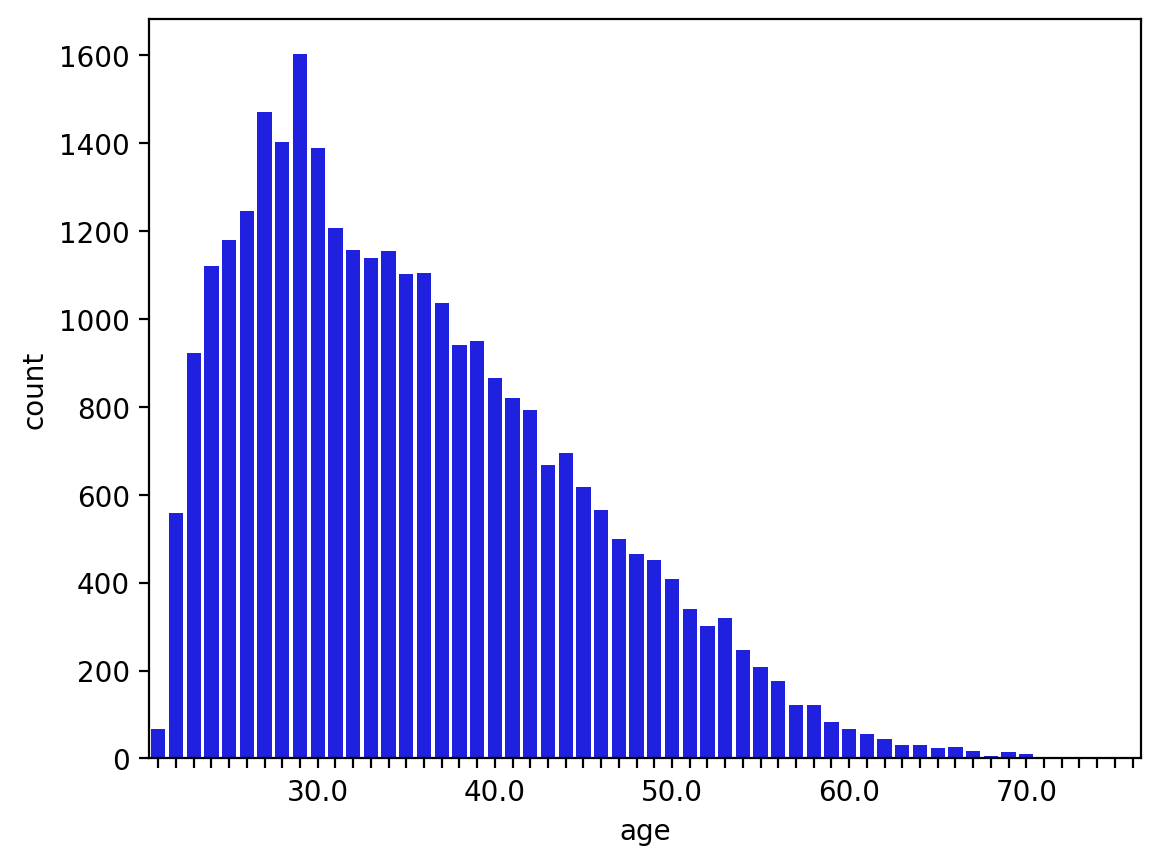

In [29]:
plot_ = sns.countplot(x=df.age.dropna(), color='blue')

for ind, label in enumerate(plot_.get_xticklabels()):
    if int(float(label.get_text())) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

In [30]:
px.histogram(df, x='age', title = 'Distribution of age')

Plot a pairplot of selected variables:

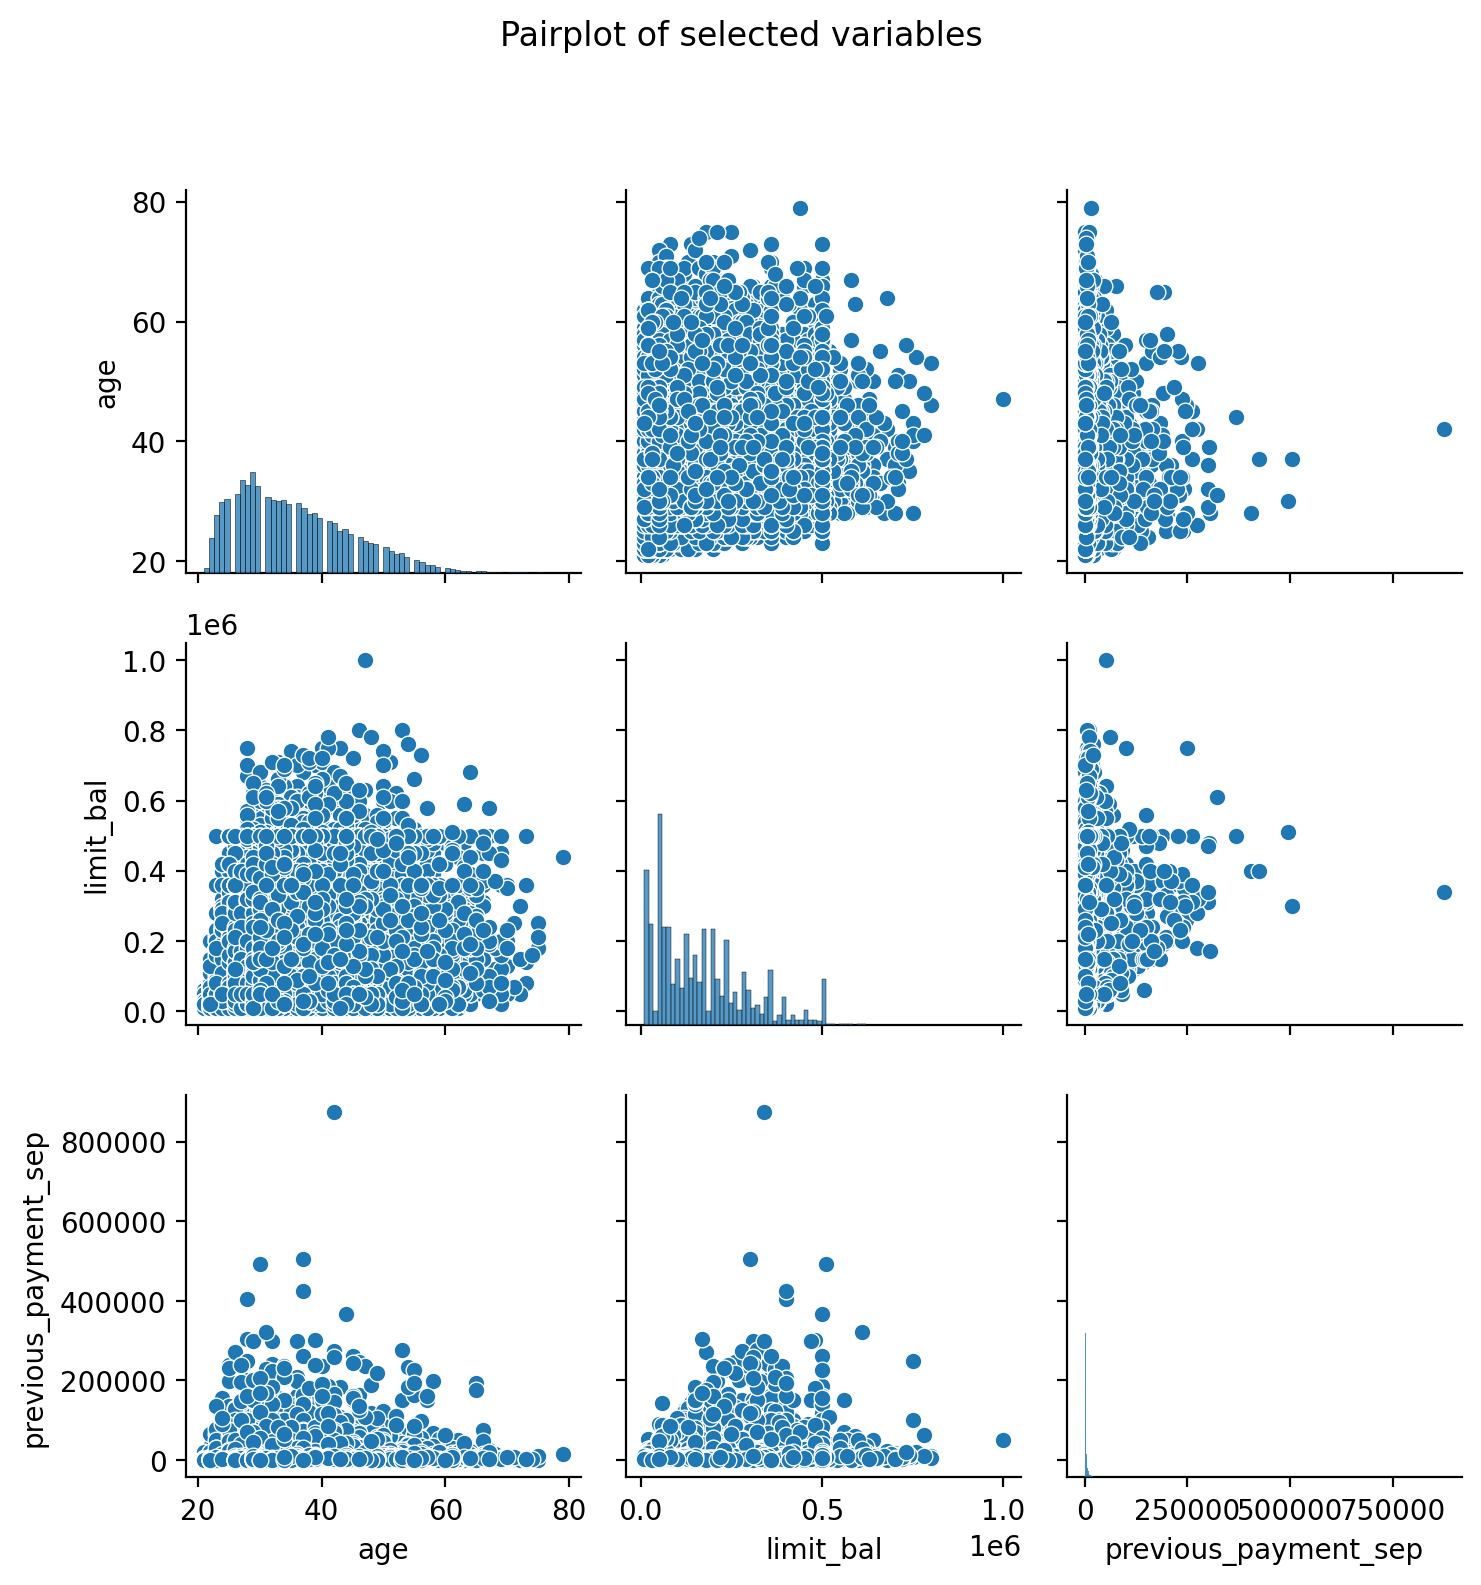

In [31]:
pair_plot = sns.pairplot(df[['age', 'limit_bal', 'previous_payment_sep']])
pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05)

plt.tight_layout()
plt.show()

we can separate the genders by specifying the hue argument:

In [32]:
# pair_plot = sns.pairplot(df[['sex', 'age', 'limit_bal', 'previous_payment_sep']],
#                          hue='sex')
# pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05);

Define and run a function for plotting the correlation heatmap:

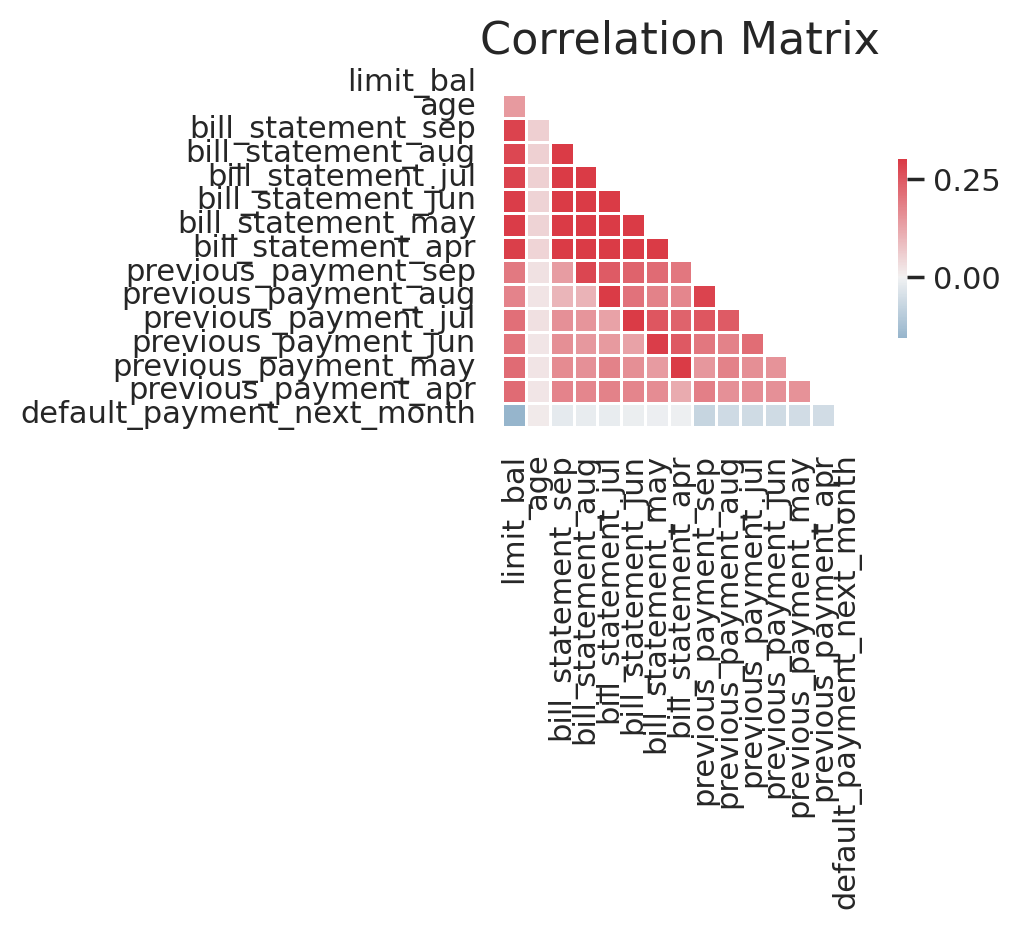

In [36]:
def plot_correlation_matrix(corr_mat):
    '''
    Function for plotting the correlation heatmap. It masks the irrelevant fields.

    Parameters
    ----------
    corr_mat : pd.DataFrame
    Correlation matrix of the features.
    '''

    # temporarily change style
    sns.set(style='white')
    # mask the upper triangle
    # Use bool instead of np.bool
    mask = np.zeros_like(corr_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # set up the matplotlib figure
    fig, ax = plt.subplots()
    # set up custom diverging colormap
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    # plot the heatmap
    sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
               square=True, linewidths=.5,
               cbar_kws={'shrink': .5}, ax=ax)
    ax.set_title('Correlation Matrix', fontsize=16)
    # change back to darkgrid style
    sns.set(style='darkgrid')

    corr_mat = df.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

plt.tight_layout()
plt.show()

We can also directly inspect the correlation between the features (numerical) and the target:

In [37]:
df.select_dtypes(include='number').corr()[['default_payment_next_month']]

,default_payment_next_month
limit_bal,-0.153520
age,0.014491
bill_statement_sep,-0.019644
bill_statement_aug,-0.014193
bill_statement_jul,-0.014076
bill_statement_jun,-0.010156
bill_statement_may,-0.006760
bill_statement_apr,-0.005372
previous_payment_sep,-0.072929
previous_payment_aug,-0.058579



Plot the distribution of limit balance for each gender and education level:

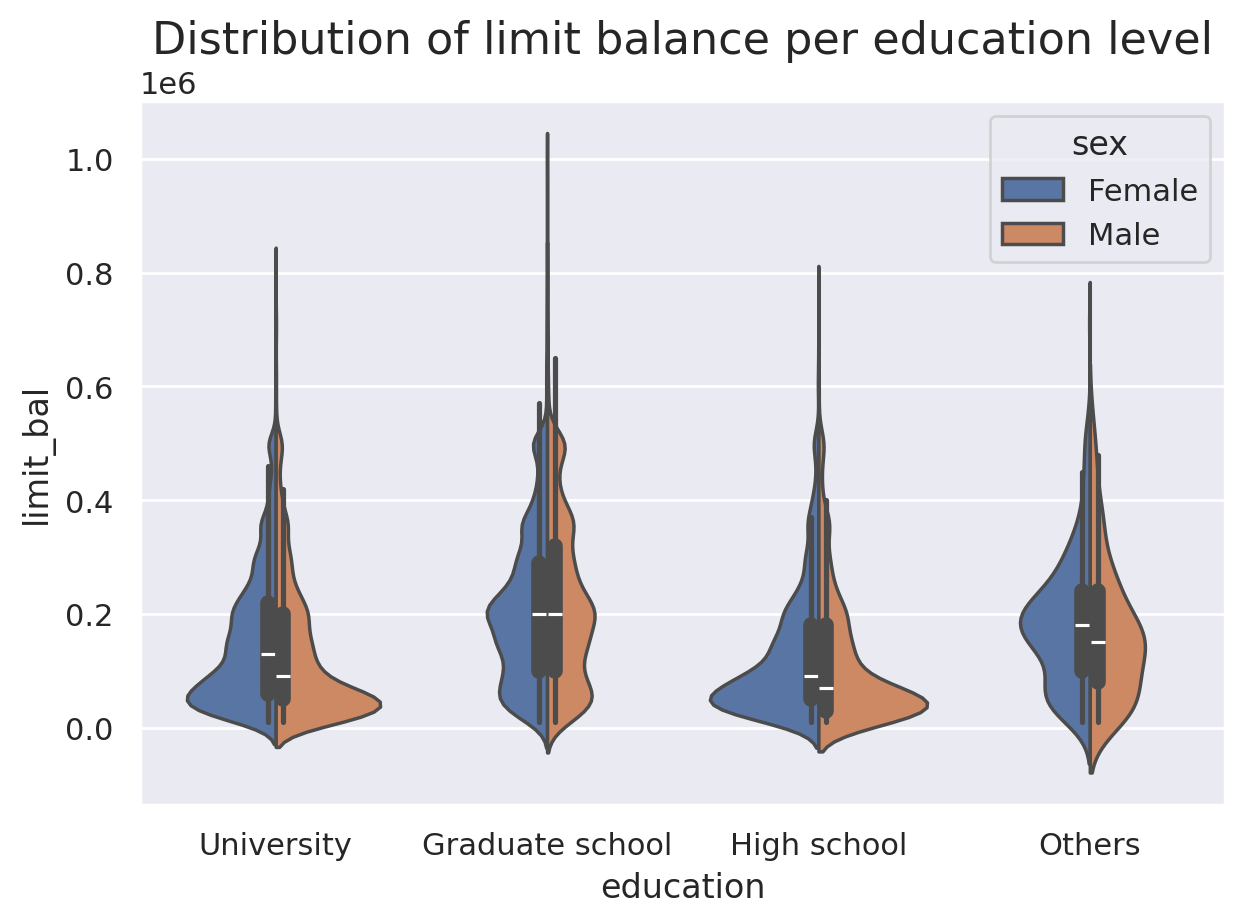

In [38]:
ax = sns.violinplot(x='education', y='limit_bal',
                   hue='sex', split=True, data=df)
ax.set_title('Distribution of limit balance per education level',
            fontsize=16)

plt.tight_layout()
plt.show()

The following code plots the same information, without splitting the violin plots.

In [39]:
# ax = sns.violinplot(x='education', y='limit_bal',
#                     hue='sex', data=df)
# ax.set_title('Distribution of limit balance per education level',
#              fontsize=16);

Investigate the distribution of the target variable per gender and education level:

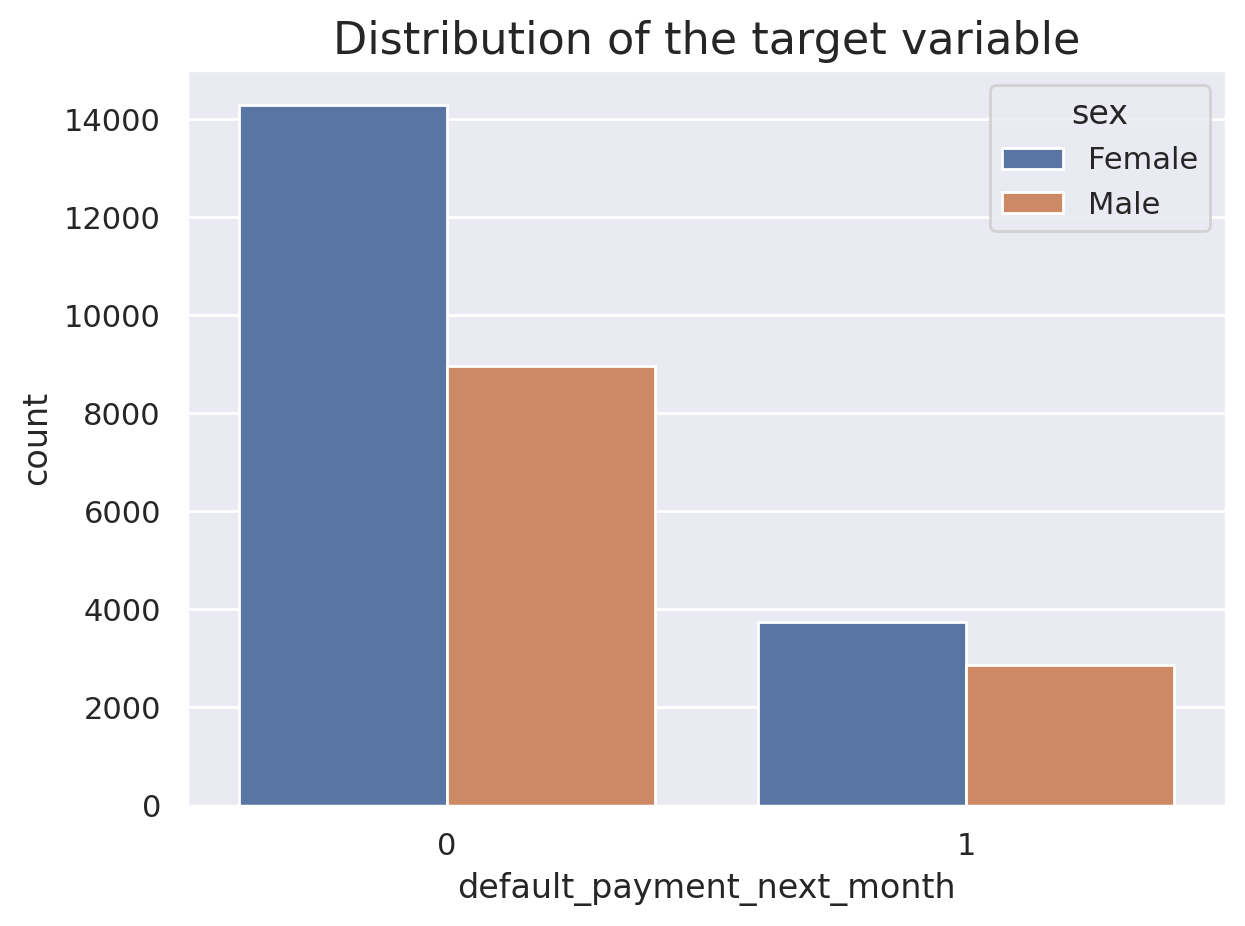

In [41]:
ax = sns.countplot(x='default_payment_next_month', hue='sex',
                  data=df, orient='h')
ax.set_title('Distribution of the target variable', fontsize=16)

plt.tight_layout()
plt.show()

Investigate the percentage of defaults per education level:

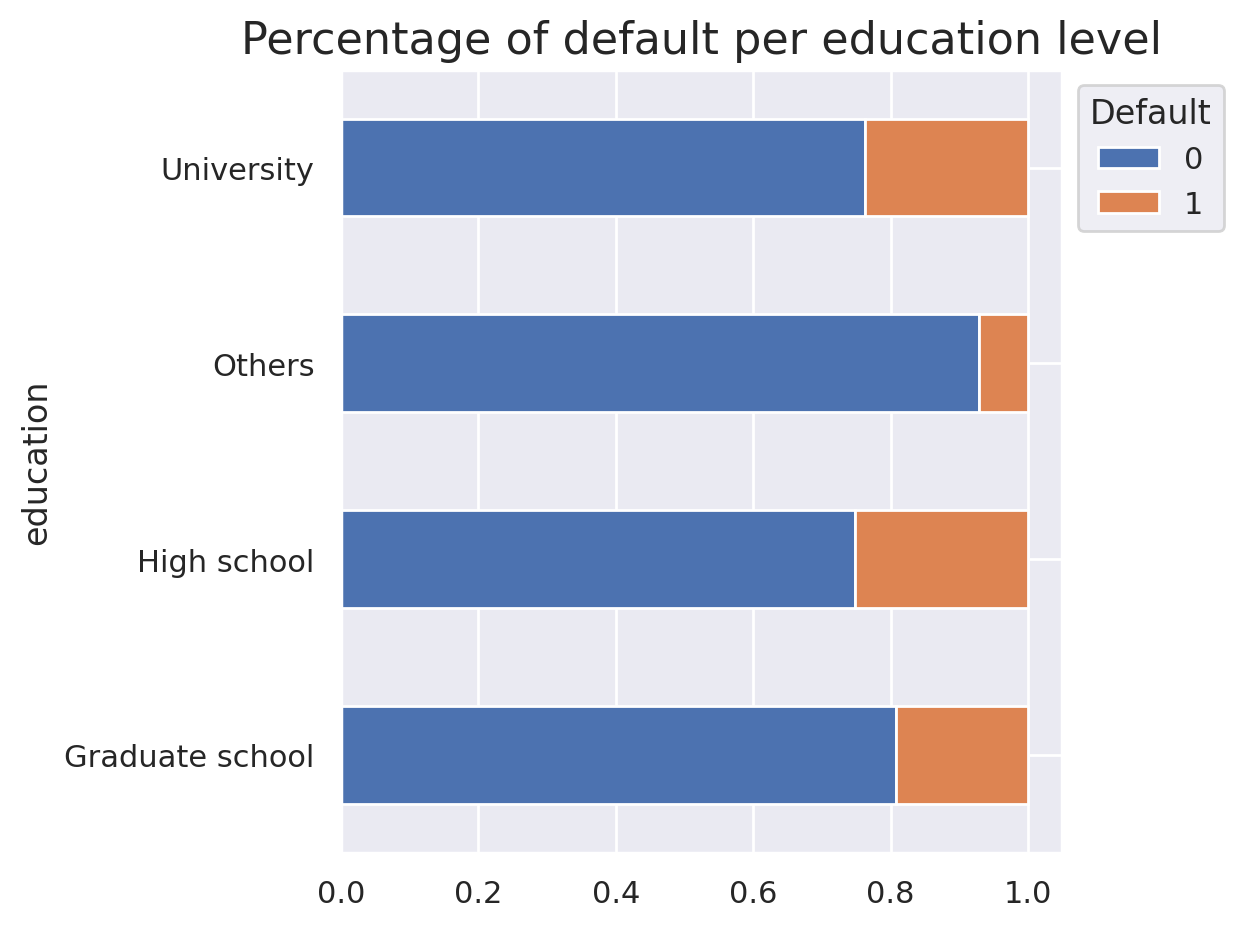

In [42]:
ax = df.groupby('education')['default_payment_next_month'] \
       .value_counts(normalize=True) \
       .unstack() \
       .plot(kind='barh', stacked='True')
ax.set_title('Percentage of default per education level',
            fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

#Splitting the data into training and test sets

In [43]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [44]:
from sklearn.model_selection import train_test_split

Split the data into training and test sets:

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42)

Split the data into training and test sets without shuffling:

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=False)

Split the data into training and test sets with stratification:

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=42)

Verify that the ratio of the target is preserved:

In [48]:
y_train.value_counts(normalize=True)

,proportion
default_payment_next_month,
0,0.778792
1,0.221208


In [49]:
y_test.value_counts(normalize=True)

,proportion
default_payment_next_month,
0,0.778833
1,0.221167


#Dealing with missing values

In [50]:
pip install missingno

In [51]:
import pandas as pd
import missingno
from sklearn.impute import SimpleImputer

Inspect the information about the DataFrame:

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   limit_bal             30000 non-null  int64  
 1   sex                   29850 non-null  object 
 2   education             29850 non-null  object 
 3   marriage              29850 non-null  object 
 4   age                   29850 non-null  float64
 5   payment_status_sep    30000 non-null  object 
 6   payment_status_aug    30000 non-null  object 
 7   payment_status_jul    30000 non-null  object 
 8   payment_status_jun    30000 non-null  object 
 9   payment_status_may    30000 non-null  object 
 10  payment_status_apr    30000 non-null  object 
 11  bill_statement_sep    30000 non-null  int64  
 12  bill_statement_aug    30000 non-null  int64  
 13  bill_statement_jul    30000 non-null  int64  
 14  bill_statement_jun    30000 non-null  int64  
 15  bill_statement_may    30

Visualize the nullity of the DataFrame:

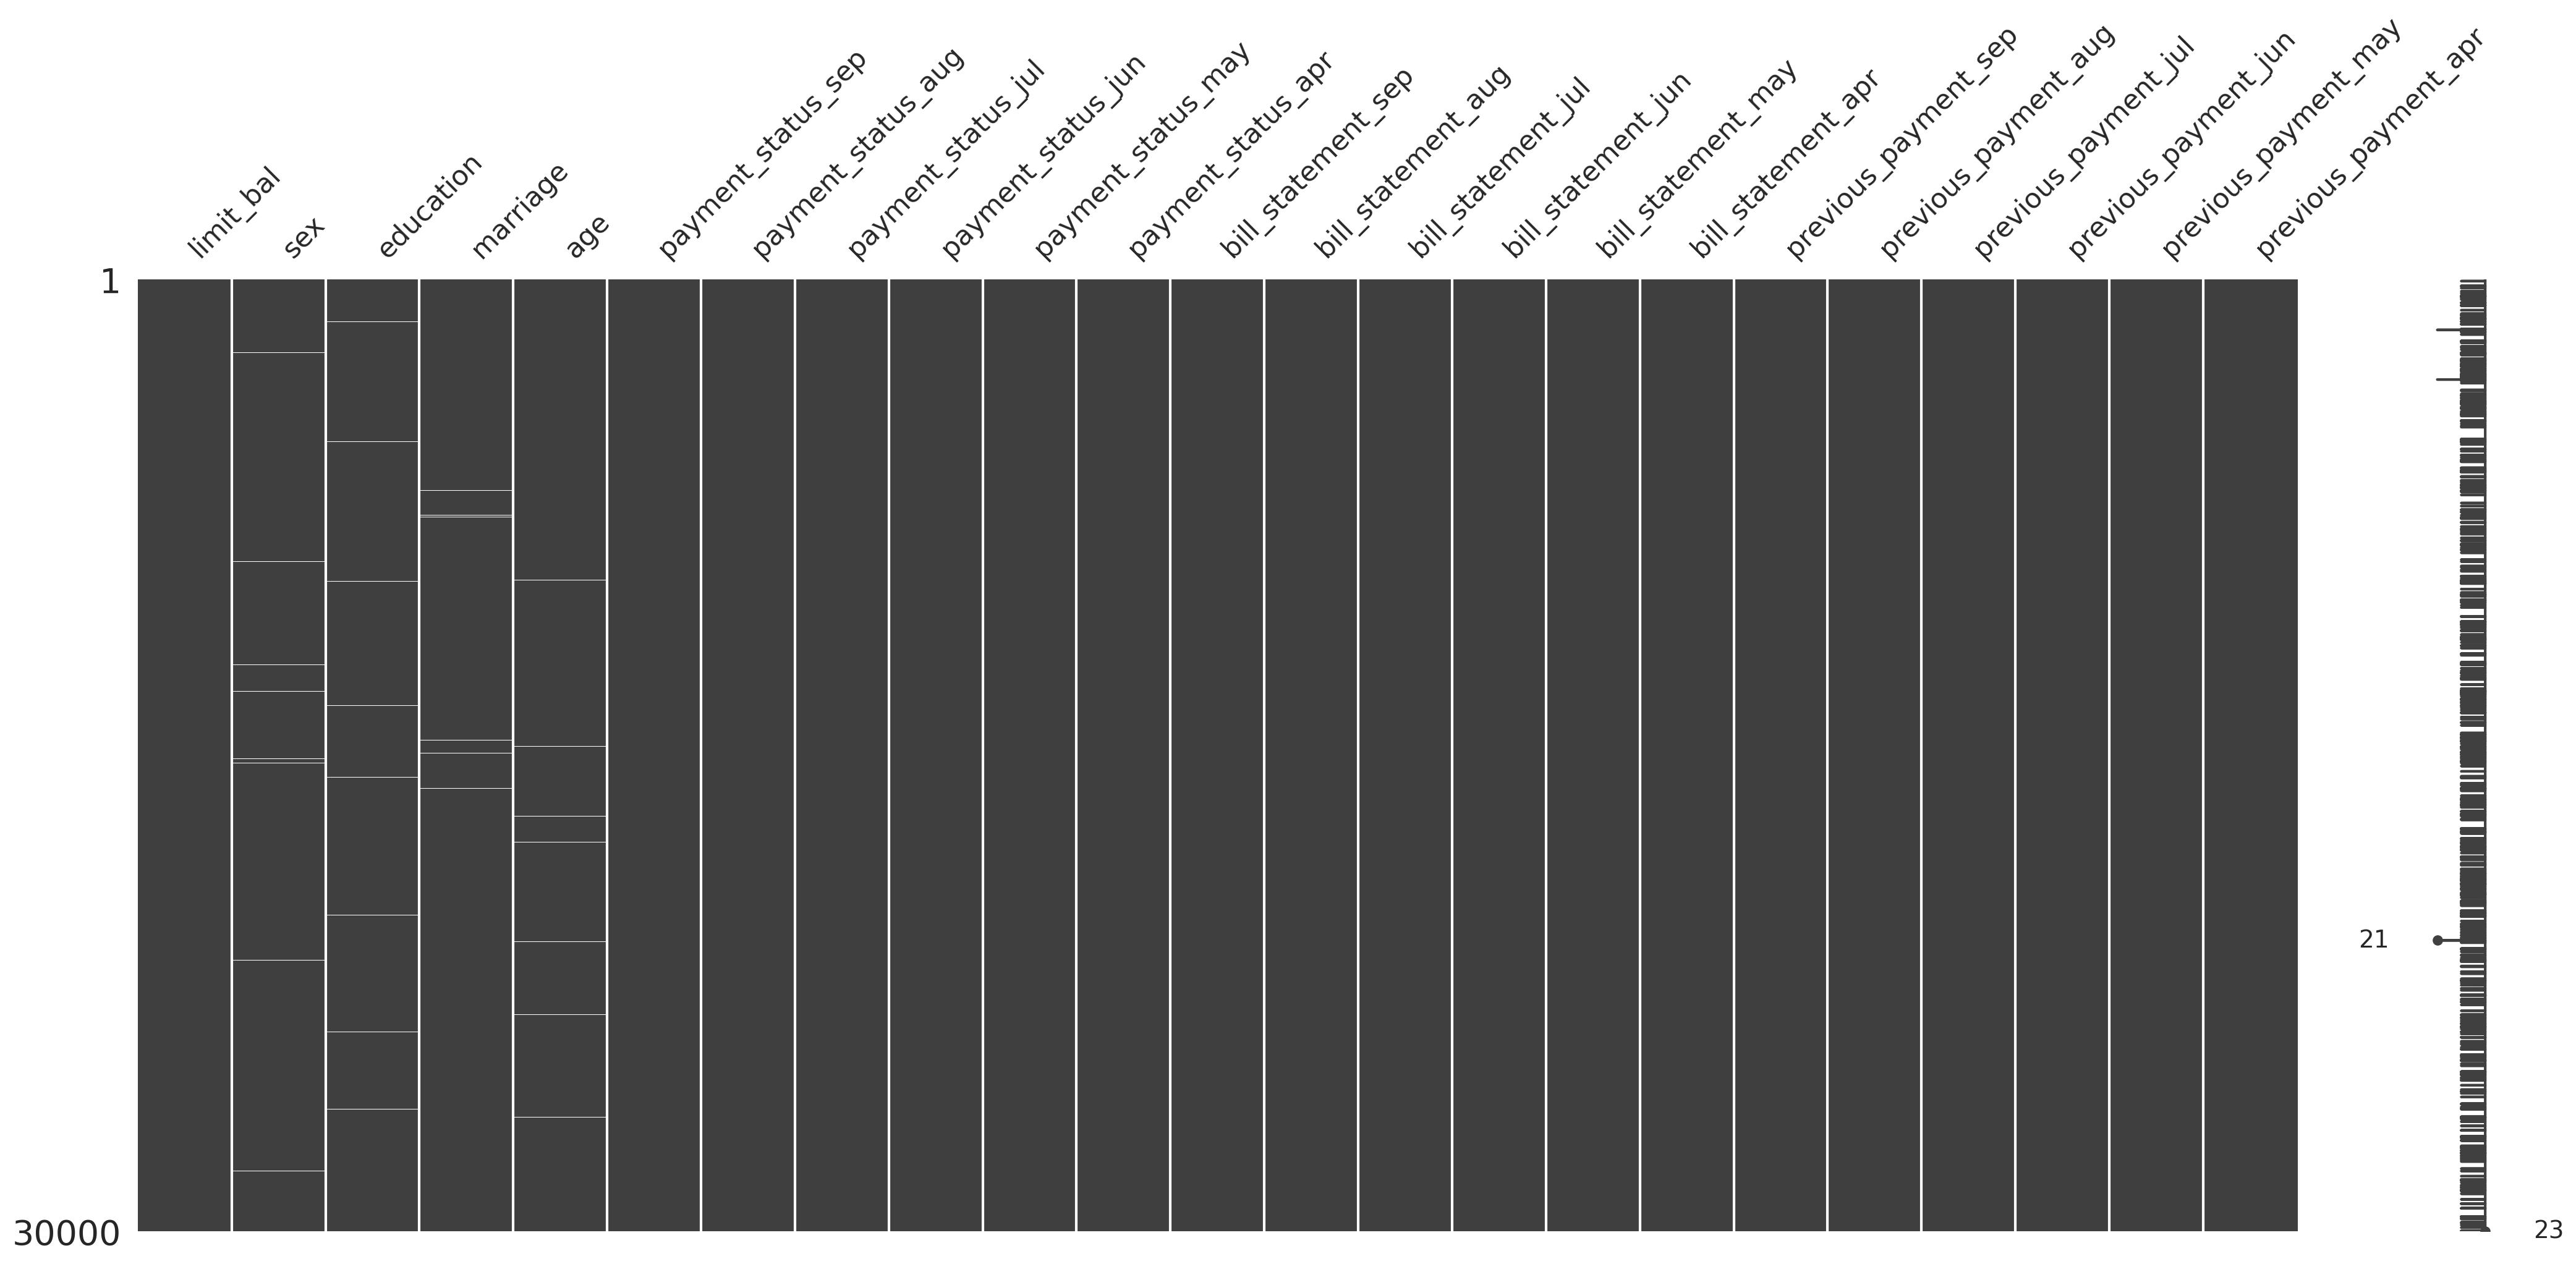

In [53]:
missingno.matrix(X)

plt.show()

Define columns with missing values per data type:

In [54]:
NUM_FEATURES = ['age']
CAT_FEATURES = ['sex', 'education', 'marriage']

Impute the numerical feature:

In [55]:
for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

In [56]:
# alternative method using pandas

# for feature in NUM_FEATURES:
#     median_value = X_train[feature].median()
#     X_train.loc[:, feature].fillna(median_value, inplace=True)
#     X_test.loc[:, feature].fillna(median_value, inplace=True)

Impute the categorical features:

In [57]:
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

Verify that there are no missing values:

In [58]:
# alternative method using pandas

# for feature in CAT_FEATURES:
#     mode_value = X_train[feature].mode().values[0]
#     X_train.loc[:, feature].fillna(mode_value, inplace=True)
#     X_test.loc[:, feature].fillna(mode_value, inplace=True)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 22788 to 27126
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   limit_bal             24000 non-null  int64  
 1   sex                   24000 non-null  object 
 2   education             24000 non-null  object 
 3   marriage              24000 non-null  object 
 4   age                   24000 non-null  float64
 5   payment_status_sep    24000 non-null  object 
 6   payment_status_aug    24000 non-null  object 
 7   payment_status_jul    24000 non-null  object 
 8   payment_status_jun    24000 non-null  object 
 9   payment_status_may    24000 non-null  object 
 10  payment_status_apr    24000 non-null  object 
 11  bill_statement_sep    24000 non-null  int64  
 12  bill_statement_aug    24000 non-null  int64  
 13  bill_statement_jul    24000 non-null  int64  
 14  bill_statement_jun    24000 non-null  int64  
 15  bill_statement_may  

#Encoding categorical variables

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

Use Label Encoder to encode a selected column:

In [61]:
COL = 'education'

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

Select categorical features for one-hot encoding:

In [62]:
CAT_FEATURES = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()

Instantiate the One-Hot Encoder object:

In [64]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False, # Changed 'sparse' to 'sparse_output'
                               handle_unknown='error',
                               drop='first')

Create the column transformer using the one-hot encoder:

In [65]:
one_hot_transformer = ColumnTransformer(
    [("one_hot", one_hot_encoder, CAT_FEATURES)]
    #,remainder='passthrough'
)

Fit the transformer:

In [66]:
one_hot_transformer.fit(X_train)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])])

Apply the transformations to both training and test sets:

In [69]:
# Replace the line causing the error with the following:
col_names = one_hot_transformer.get_feature_names_out()

# The rest of the code should remain the same:
X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train),
                          columns=col_names,
                          index=X_train.index)
X_train_ohe = pd.concat([X_train, X_train_cat], axis=1) \
                .drop(CAT_FEATURES, axis=1)

X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test),
                         columns=col_names,
                         index=X_test.index)
X_test_ohe = pd.concat([X_test, X_test_cat], axis=1) \
               .drop(CAT_FEATURES, axis=1)

#Fitting a decision tree classifier

In [70]:
pip install pydotplus

In [73]:
load /content/chapter_8_utils.py

In [74]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

from chapter_8_utils import performance_evaluation_report

from io import StringIO
import seaborn as sns
from ipywidgets import Image
import pydotplus

Create the instance of the model, fit it to the training data and create prediction:

In [75]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_ohe, y_train)
y_pred = tree_classifier.predict(X_test_ohe)

Evaluate the results:

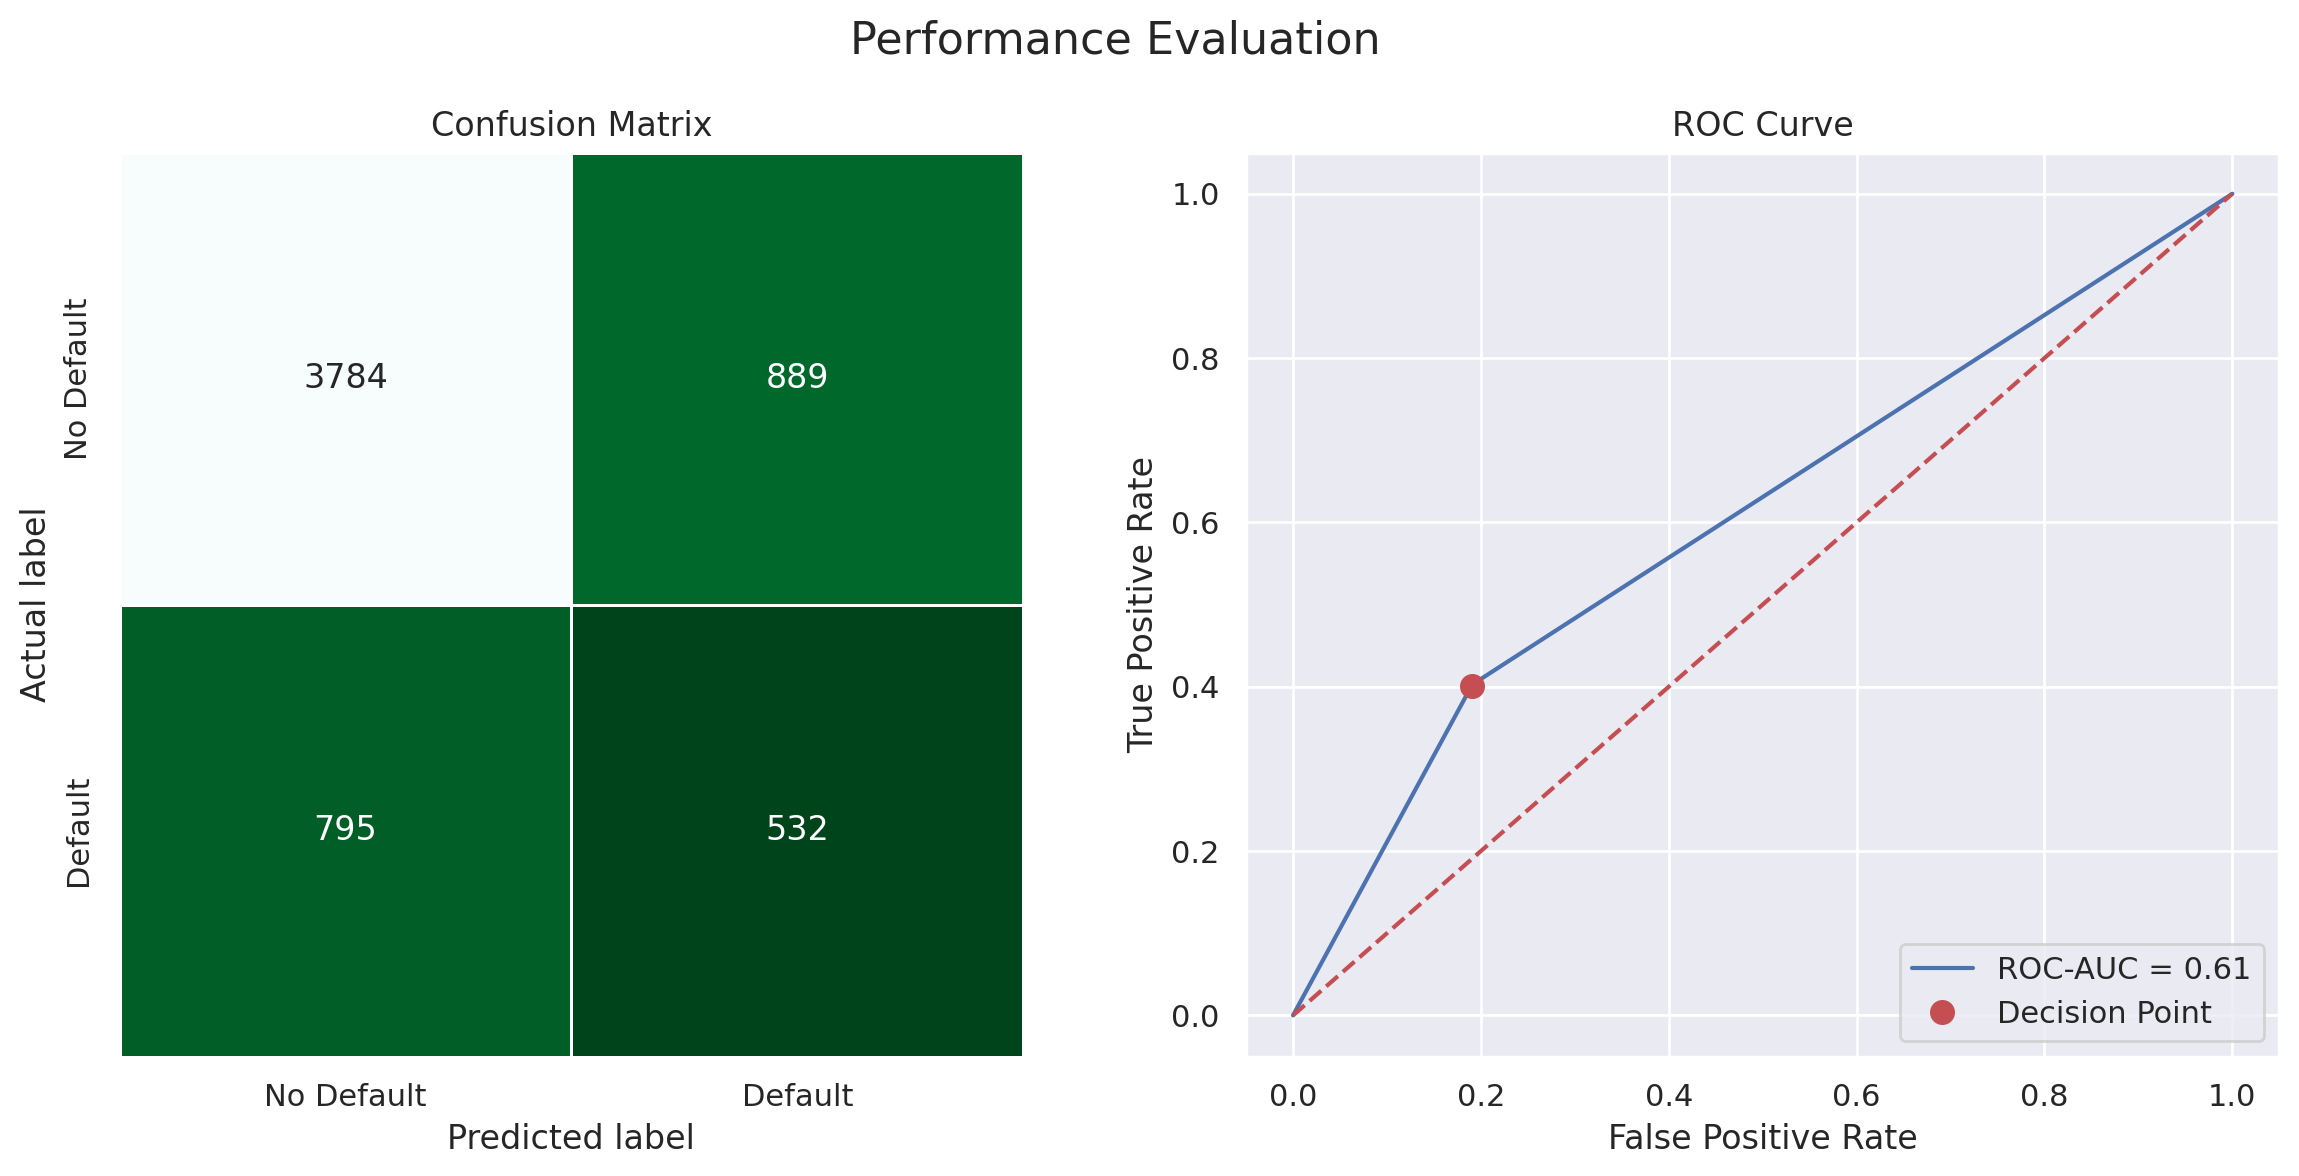

In [76]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_classifier,
                                         X_test_ohe,
                                         y_test, labels=LABELS,
                                         show_plot=True)

plt.tight_layout()
plt.show()

In [77]:
tree_perf

{'accuracy': 0.7193333333333334,
 'precision': 0.37438423645320196,
 'recall': 0.400904295403165,
 'specificity': 0.8097581853199229,
 'f1_score': 0.38719068413391555,
 'cohens_kappa': 0.20545212086249653,
 'roc_auc': 0.6059202515178426,
 'pr_auc': 0.4542470275794692}

Plot the simplified Decision Tree:

In [78]:
small_tree = DecisionTreeClassifier(max_depth=3,
                                    random_state=42)
small_tree.fit(X_train_ohe, y_train)

tree_dot = StringIO()
export_graphviz(small_tree, feature_names=X_train_ohe.columns,
                class_names=LABELS, rounded=True, out_file=tree_dot,
                proportion=False, precision=2, filled=True)
tree_graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())
tree_graph.set_dpi(300)
Image(value=tree_graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x15\x86\x00\x00\x07\x0c\x08\x02\x00\x00\x0026\x04\x7…

#Implementing scikit-learn's pipelines

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from chapter_8_utils import performance_evaluation_report

Load the data, separate the target and create the stratified train-test split:

In [80]:
df = pd.read_csv('credit_card_default.csv', index_col=0,
                                 na_values='')

X = df.copy()
y = X.pop('default_payment_next_month')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=42)

Store lists of numerical/categorical features:

In [81]:
num_features = X_train.select_dtypes(include='number') \
                      .columns \
                      .to_list()
cat_features = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()

Define the numerical pipeline:

In [83]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # Replacing 'sparse' with 'sparse_output'
    ('onehot', OneHotEncoder(categories=cat_list, sparse_output=False,
                            handle_unknown='error', drop='first'))
])

Define the column transformer object:

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Define num_pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Existing code for cat_pipeline
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(categories=cat_list, sparse_output=False,
                            handle_unknown='error', drop='first'))
])

# ColumnTransformer using both pipelines
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_features),
    ('categorical', cat_pipeline, cat_features)],
    remainder='drop')

Create the joint pipeline:

In [86]:
dec_tree = DecisionTreeClassifier(random_state=42)

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', dec_tree)])

Fit the pipeline to the data:

In [87]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_paym...
                                                                                              'months',
                                                                                              'Payment '
                                                                                              'delayed '
                                                                                              '7 '
                                                                                              'months',
                                                                                              'Payment '
                                                                                              'delayed '
                                                                                              '5 '
                                                                                              'months',
                                                                                              'Payment '
                                                                                              'delayed '
                                                                                              '8 '
                                                                                              'months']],
                                                                                 drop='first',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'education',
                                                   'marriage',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

Evaluate the performance of the entire pipeline:

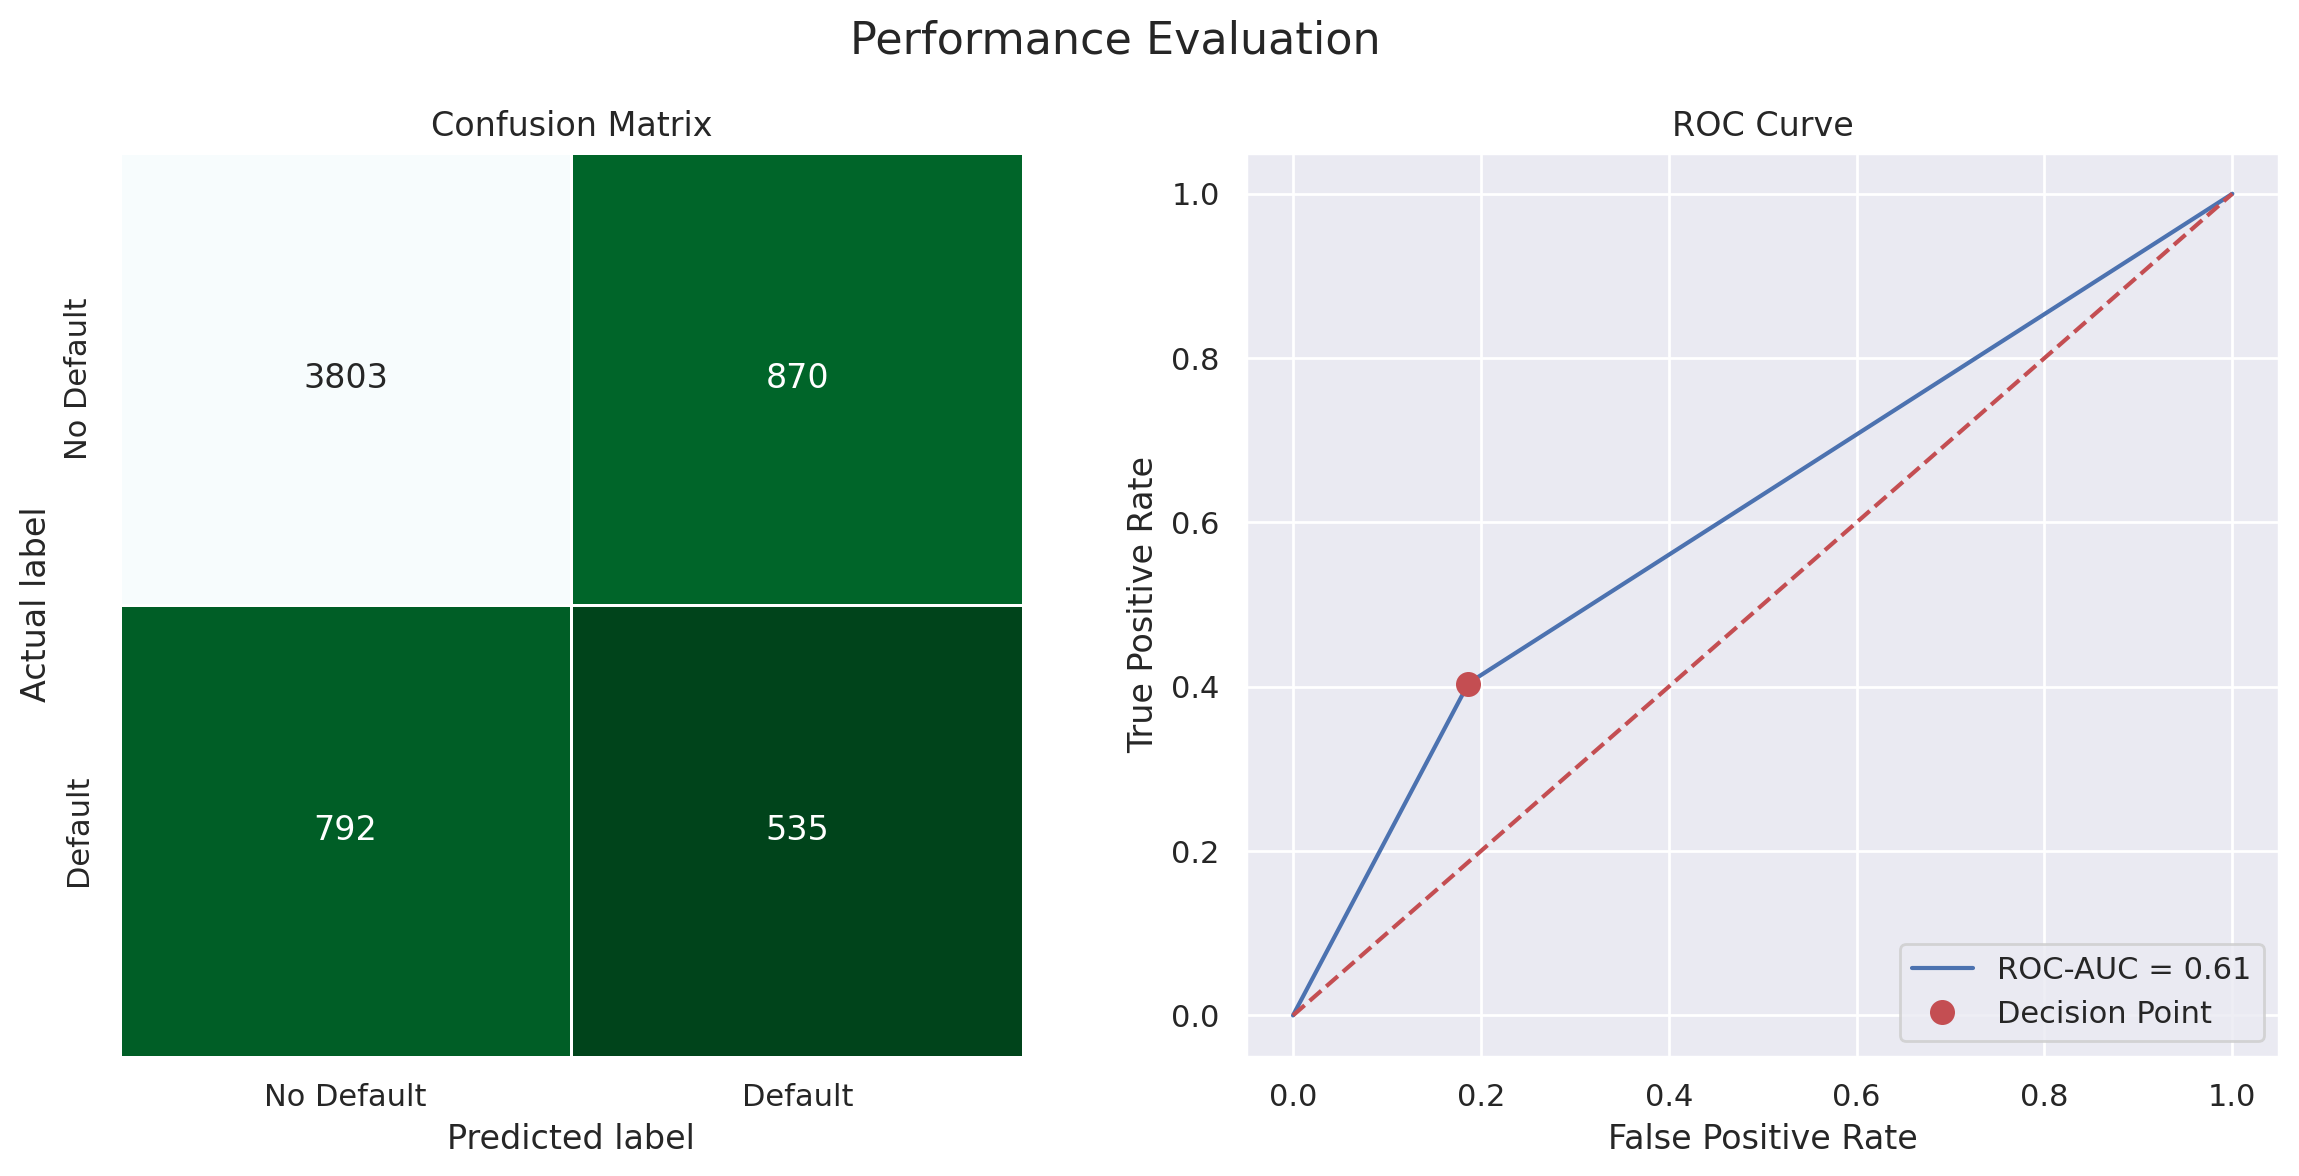

In [88]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_pipeline, X_test,
                                         y_test, labels=LABELS,
                                         show_plot=True)

plt.tight_layout()
plt.show()

In [89]:
tree_perf

{'accuracy': 0.723,
 'precision': 0.3807829181494662,
 'recall': 0.4031650339110776,
 'specificity': 0.8138240958698909,
 'f1_score': 0.3916544655929722,
 'cohens_kappa': 0.21251696855358815,
 'roc_auc': 0.6087741940061644,
 'pr_auc': 0.4578979711916332}

#Tuning hyperparameters using grid search and cross-validation

In [90]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                    RandomizedSearchCV, cross_validate,
                                    StratifiedKFold)
from sklearn import metrics

Define the cross-validation scheme:

In [91]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

Evaluate the pipeline using cross-validation:

In [92]:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)

array([0.71791667, 0.73395833, 0.72395833, 0.7275    , 0.71791667])

Add extra metrics to cross-validation:

In [93]:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold,
              scoring=['accuracy', 'precision', 'recall',
                      'roc_auc'])

{'fit_time': array([1.03028822, 1.49204683, 1.68639159, 1.31469035, 1.00333405]),
 'score_time': array([0.13691783, 0.12985396, 0.19370818, 0.06178403, 0.0989697 ]),
 'test_accuracy': array([0.71791667, 0.73395833, 0.72395833, 0.7275    , 0.71791667]),
 'test_precision': array([0.37657961, 0.40393208, 0.38634399, 0.39285714, 0.37237762]),
 'test_recall': array([0.42130066, 0.42561205, 0.42090395, 0.42467043, 0.40112994]),
 'test_roc_auc': array([0.61146123, 0.62343353, 0.61577966, 0.61986958, 0.60516528])}

Define the parameter grid:

In [94]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
             'classifier__max_depth': range(3, 11),
             'classifier__min_samples_leaf': range(2, 11)}

Run Grid Search:

In [95]:
classifier_gs = GridSearchCV(tree_pipeline, param_grid, scoring='recall',
                            cv=k_fold, n_jobs=-1, verbose=1)

classifier_gs.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['limit_bal',
                                                                          'age',
                                                                          'bill_statement_sep',
                                                                          'bill_statement_aug',
                                                                          'bill_statement_jul',
                                                                          'bill_statement_j...
                                                                          'payment_status_sep',
                                                                          'payment_status_aug',
                                                                          'payment_status_jul',
                                                                          'payment_status_jun',
                                                                          'payment_status_may',
                                                                          'payment_status_apr'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['entropy', 'gini'],
                         'classifier__max_depth': range(3, 11),
                         'classifier__min_samples_leaf': range(2, 11)},
             scoring='recall', verbose=1)

In [96]:
print(f'Best parameters: {classifier_gs.best_params_}')
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}')
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 7}
Recall (Training set): 0.3858
Recall (Test set): 0.3775



Evaluate the performance of the Grid Search:

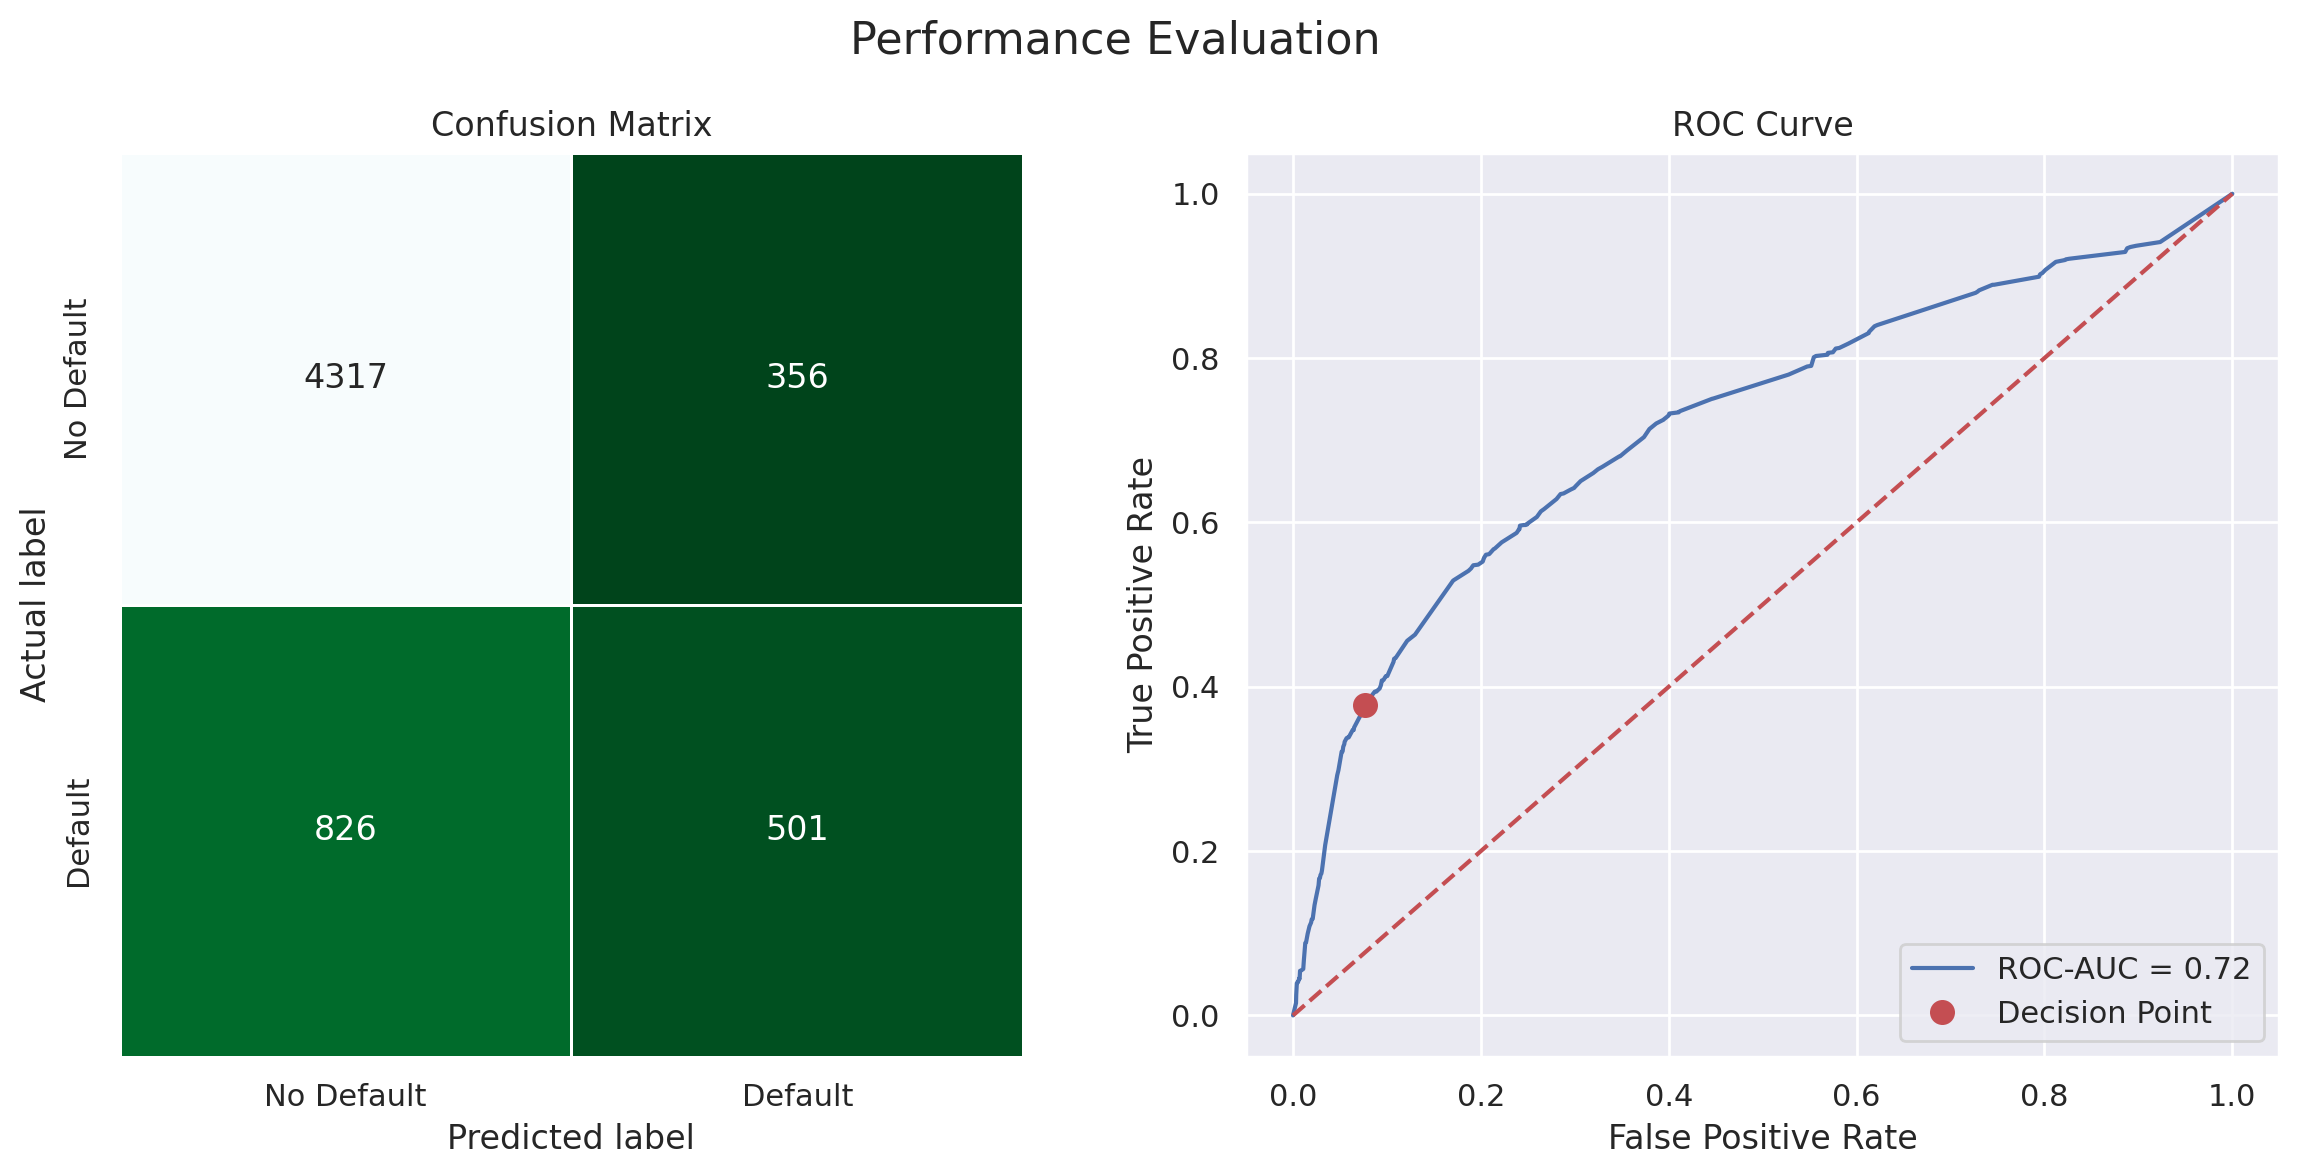

In [97]:
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test,
                                            y_test, labels=LABELS,
                                            show_plot=True)

plt.tight_layout()
plt.show()

In [98]:
tree_gs_perf

{'accuracy': 0.803,
 'precision': 0.5845974329054843,
 'recall': 0.3775433308214017,
 'specificity': 0.9238176760111277,
 'f1_score': 0.45879120879120877,
 'cohens_kappa': 0.3451234505087113,
 'roc_auc': 0.7209154676667948,
 'pr_auc': 0.4694024187277488}

Run Randomized Grid Search:

In [99]:
classifier_rs = RandomizedSearchCV(tree_pipeline, param_grid, scoring='recall',
                                  cv=k_fold, n_jobs=-1, verbose=1,
                                  n_iter=100, random_state=42)
classifier_rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['limit_bal',
                                                                                'age',
                                                                                'bill_statement_sep',
                                                                                'bill_statement_aug',
                                                                                'bill_statement_jul',
                                                                                'bill_state...
                                                                                'payment_status_jul',
                                                                                'payment_status_jun',
                                                                                'payment_status_may',
                                                                                'payment_status_apr'])])),
                                             ('classifier',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__criterion': ['entropy',
                                                                  'gini'],
                                        'classifier__max_depth': range(3, 11),
                                        'classifier__min_samples_leaf': range(2, 11)},
                   random_state=42, scoring='recall', verbose=1)

In [100]:
print(f'Best parameters: {classifier_rs.best_params_}')
print(f'Recall (Training set): {classifier_rs.best_score_:.4f}')
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_rs.predict(X_test)):.4f}')

Best parameters: {'classifier__min_samples_leaf': 7, 'classifier__max_depth': 10, 'classifier__criterion': 'gini'}
Recall (Training set): 0.3858
Recall (Test set): 0.3775


Evaluate the performance of the Randomized Grid Search:

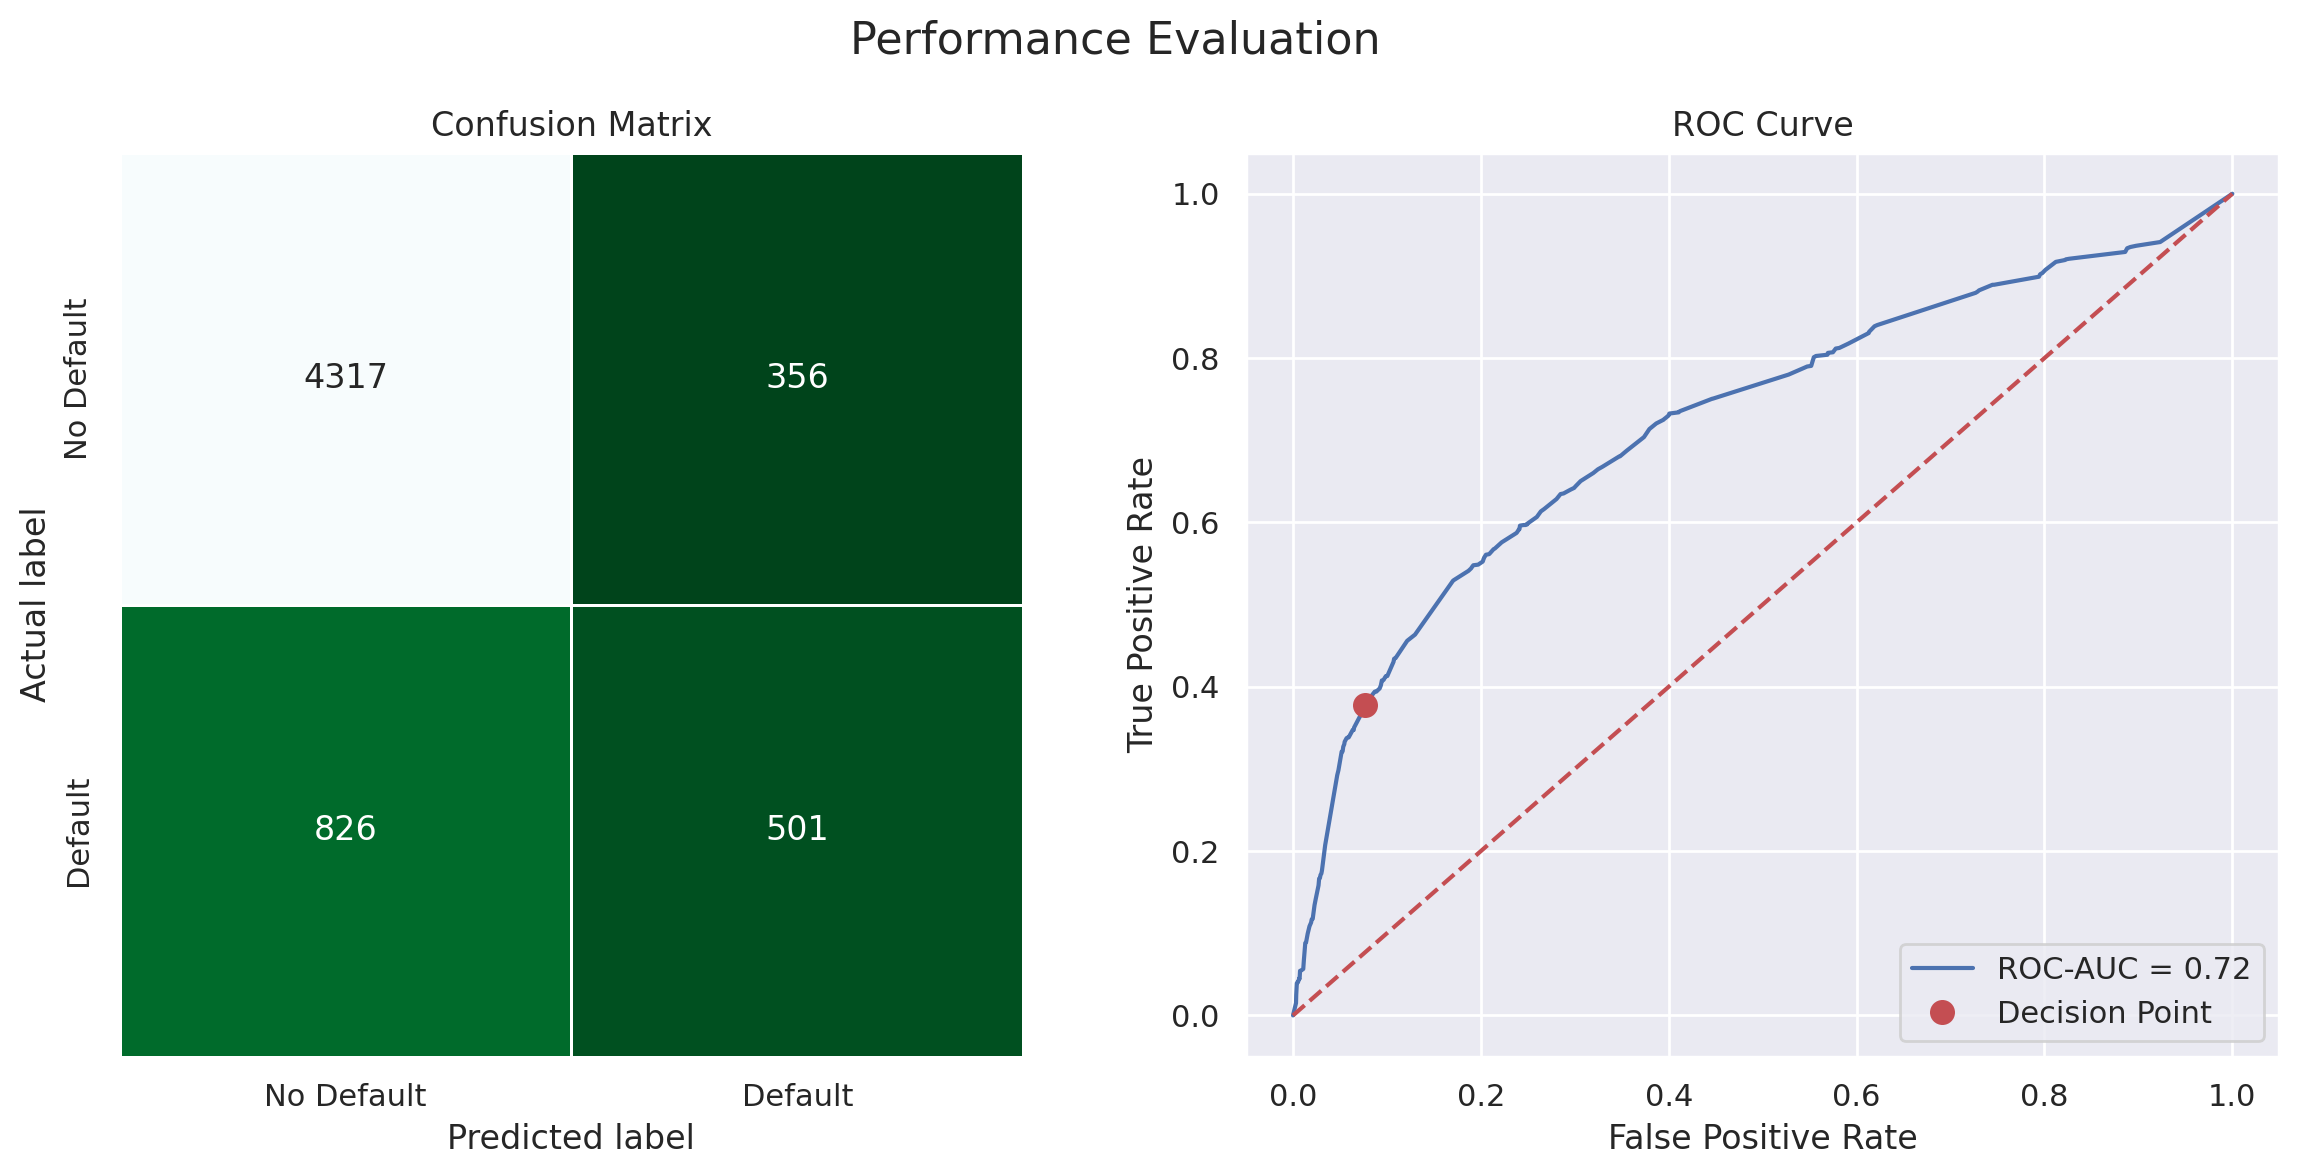

In [101]:
tree_rs_perf = performance_evaluation_report(classifier_rs, X_test,
                                            y_test, labels=LABELS,
                                            show_plot=True)

plt.tight_layout()
plt.show()

In [102]:
tree_rs_perf

{'accuracy': 0.803,
 'precision': 0.5845974329054843,
 'recall': 0.3775433308214017,
 'specificity': 0.9238176760111277,
 'f1_score': 0.45879120879120877,
 'cohens_kappa': 0.3451234505087113,
 'roc_auc': 0.7209154676667948,
 'pr_auc': 0.4694024187277488}